In [28]:
import pandas as pd
import category_encoders as ce
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [11]:
heart = pd.read_csv('data/heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [12]:
heart['old'] = heart['age'].apply(lambda x: 1 if x>60 else 0)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [13]:
heart['old'].sum()

79

In [25]:
def get_trestbps_mean(row):
    if row['sex'] == 1:
        if row['age'] < 21:
            return 123
        elif 21 <= row['age'] < 30:
            return 126
        elif 31 <= row['age'] < 40:
            return 129
        elif 41 <= row['age'] < 50:
            return 135
        elif row['age'] >= 51:
            return 142
    else:
        if row['age'] < 21:
            return 116
        elif 21 <= row['age'] < 30:
            return 120
        elif 31 <= row['age'] < 40:
            return 127
        elif 41 <= row['age'] < 50:
            return 137
        elif 51 <= row['age'] < 60:
            return 144
        elif row['age'] >= 61:
            return 159
               
heart['trestbps_mean'] = heart[['age', 'sex']].apply(get_trestbps_mean, axis=1)
display(heart)
heart['trestbps_mean'].loc[300]

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,1,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,123,1,0.2,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,1,110,264,0,132,0,1.2,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,1,144,193,1,141,0,3.4,0,1,...,0,0,0,1,0,0,0,0,0,1
301,57,1,130,131,0,115,1,1.2,0,0,...,0,0,1,0,0,0,0,0,0,1


142.0

In [26]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  289 non-null    float64
 11  cp_0           303 non-null    uint8  
 12  cp_1           303 non-null    uint8  
 13  cp_2           303 non-null    uint8  
 14  cp_3           303 non-null    uint8  
 15  restecg_0      303 non-null    uint8  
 16  restecg_1      303 non-null    uint8  
 17  restecg_2      303 non-null    uint8  
 18  slope_0   

In [16]:
#encoder = ce.OneHotEncoder(cols=['cp','restecg','slope','ca','thal']) # указываем столбец для кодирования
#cols_bin = encoder.fit_transform(heart[['cp','restecg','slope','ca','thal']])
#heart = pd.concat([heart, cols_bin], axis=1)
heart = pd.get_dummies(heart, columns=['cp','restecg','slope','ca','thal'])

In [17]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  289 non-null    object 
 11  cp_0           303 non-null    uint8  
 12  cp_1           303 non-null    uint8  
 13  cp_2           303 non-null    uint8  
 14  cp_3           303 non-null    uint8  
 15  restecg_0      303 non-null    uint8  
 16  restecg_1      303 non-null    uint8  
 17  restecg_2      303 non-null    uint8  
 18  slope_0   

<AxesSubplot: >

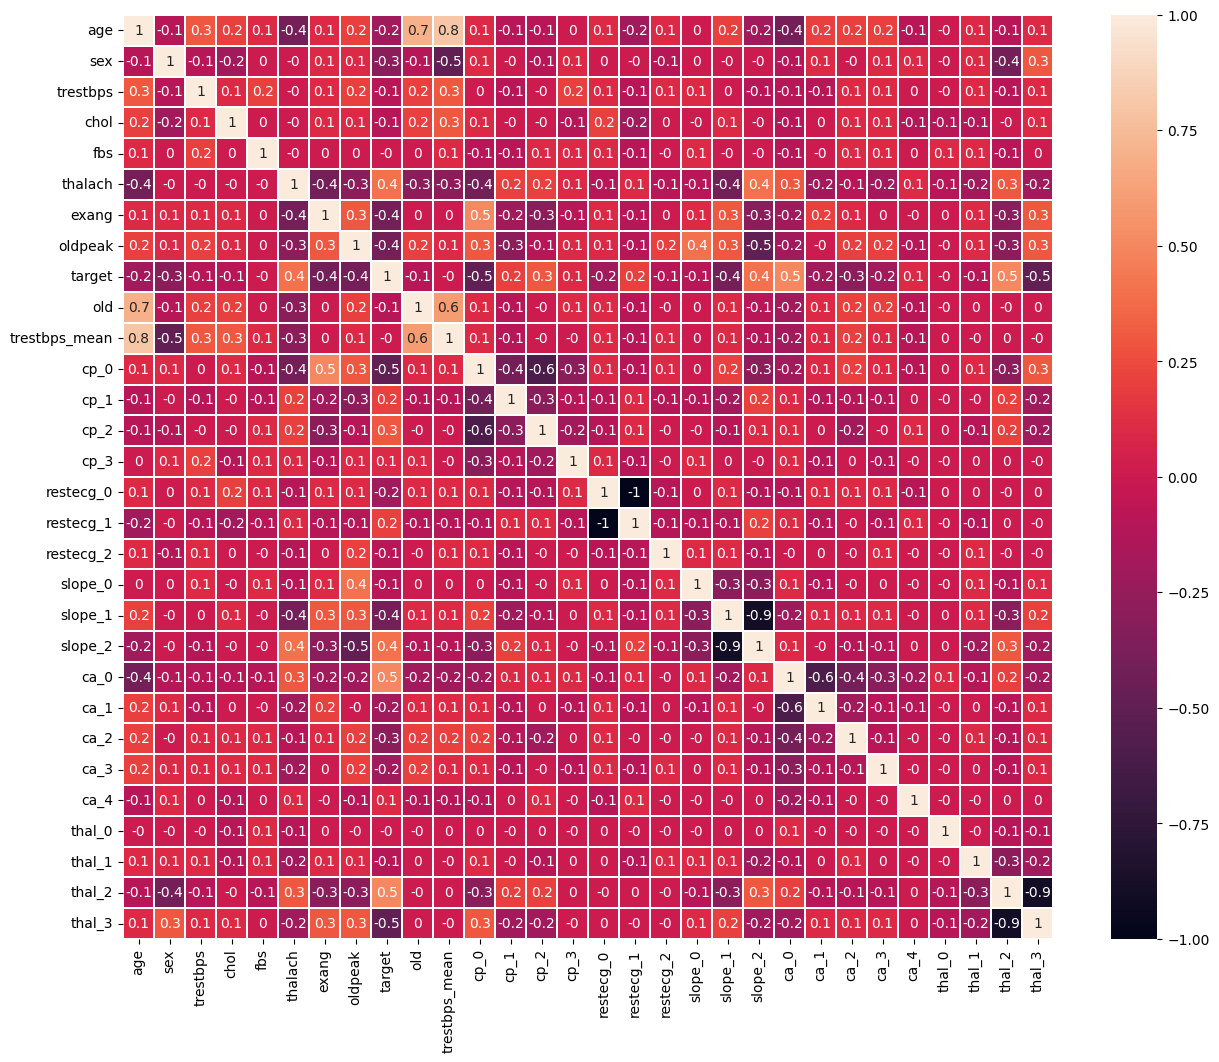

In [27]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(round(heart.corr(), 1), annot=True, linewidths=.1, ax=ax)

In [31]:
r_scaler = preprocessing.RobustScaler()
col_names = list(heart.columns)
heart_r = r_scaler.fit_transform(heart)
heart_r = pd.DataFrame(heart_r, columns=col_names)
heart_r.describe()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,old,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,-0.316832,0.081188,0.098646,0.148515,-0.103173,0.326733,0.149752,-0.455446,0.260726,...,0.468647,-0.422442,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,-0.452145,0.386139
std,0.672748,0.466011,0.876907,0.816232,0.356198,0.704774,0.469794,0.725672,0.498835,0.439757,...,0.499842,0.494765,0.411169,0.331734,0.248704,0.127605,0.081110,0.236774,0.498528,0.487668
min,-1.925926,-1.000000,-1.800000,-1.795276,0.000000,-2.523077,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,-0.555556,-1.000000,-0.500000,-0.456693,0.000000,-0.600000,0.000000,-0.500000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.000000,0.500000,0.543307,0.000000,0.400000,1.000000,0.500000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.629630,0.000000,3.500000,5.102362,1.000000,1.507692,1.000000,3.375000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
